<a href="https://colab.research.google.com/github/mahmoudarekat/PredictionofProductSales/blob/main/PredictionofProductSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import missingno as msno
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns

##Loading Data

In [36]:
fpath='/content/drive/MyDrive/DS Coding Dojo/Week2/sales_predictions_2023.csv'

In [37]:
df_sales=pd.read_csv(fpath)

In [38]:
df_sales.head()
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Data Cleaning
###Value Counts

Print Value Counts for All Columns

In [39]:
for i in df_sales:

    print(i)
    print(df_sales[i].value_counts())
    print("")


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
He

###Handling Nulls

In [40]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
#df_sales['Item_Weight']=df_sales['Item_Weight'].fillna(-1)
#df_sales['Outlet_Size']=df_sales['Outlet_Size'].fillna("MISSING")

###Duplicate Rows

In [42]:
dup_rows=df_sales.duplicated(keep='first')
dup_rows.sum()

0

No Dup Rows

###Consistency
By looking at the value counts there are incosistencies in Item_Fat_Content Column

In [43]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Make it either LF or RF

In [44]:
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace('Low Fat','LF')
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace('low fat','LF')
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace('Regular','RF')
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace('reg','RF')




In [45]:
#Check
df_sales['Item_Fat_Content'].value_counts()

LF    5517
RF    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
df_numeric=df_sales.select_dtypes("number")
df_numeric

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


###Central Tendency Functions
ctf function

In [47]:
def ctf(data_list, verbose):

  if(verbose):

      print(" the mean is "+str(np.mean(data_list))+" and the median is "+str(np.median(data_list))+" and the mode is "+str(mode(data_list)))
  else:
    print(np.mean(data_list))
    print(np.median(data_list))
    print(mode(data_list))

In [48]:
for i in df_numeric:

    print(i)
    ctf(df_numeric[i],True)
    print(" ")


Item_Weight
 the mean is 12.857645184135976 and the median is nan and the mode is 12.15
 
Item_Visibility
 the mean is 0.06613202877895108 and the median is 0.053930934 and the mode is 0.0
 
Item_MRP
 the mean is 140.9927819781767 and the median is 143.0128 and the mode is 172.0422
 
Outlet_Establishment_Year
 the mean is 1997.8318667135984 and the median is 1999.0 and the mode is 1985
 
Item_Outlet_Sales
 the mean is 2181.288913575032 and the median is 1794.331 and the mode is 958.752
 


In [49]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


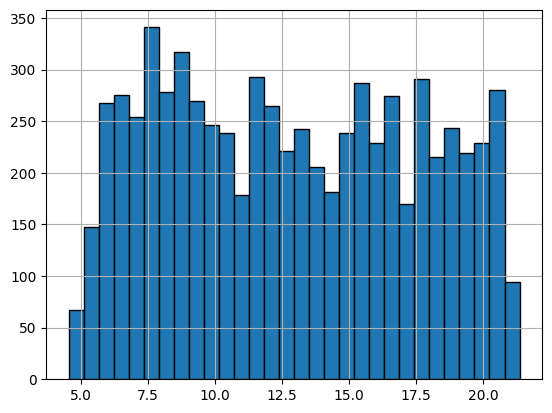

In [50]:
df = df_sales[df_sales['Item_Weight']>0]
ax=df['Item_Weight'].hist(bins = 30, edgecolor = 'black')


This histogram shows the distribution of the weights of the items

---



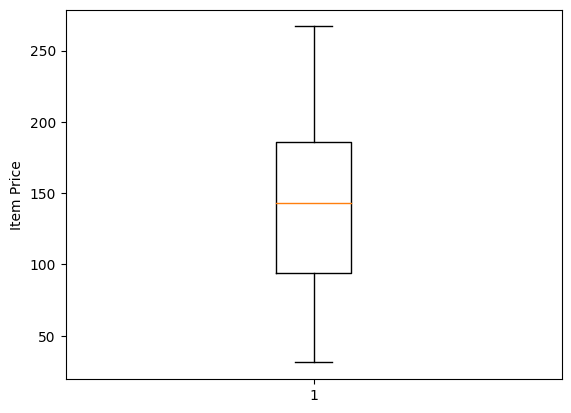

In [51]:
fig, ax = plt.subplots()
data = df_sales["Item_MRP"]
ax.boxplot(data);
ax.set_ylabel("Item Price");


CountPlot

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

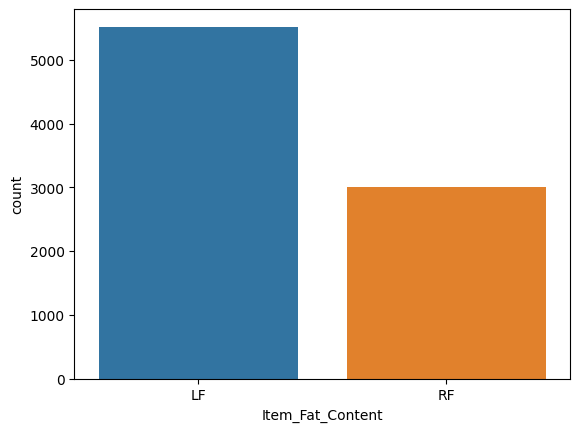

In [52]:
sns.countplot(df_sales, x="Item_Fat_Content")


In [53]:
temp_df = df.copy()


#Feature Inspection


In [54]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

##Item Fat Content
Item_Fat_Content	Whether the product is low-fat or regular


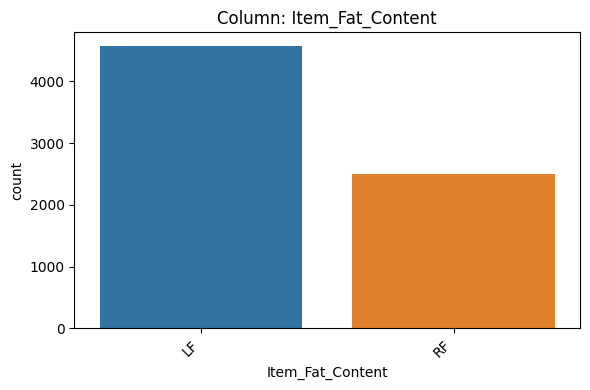

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'LF' occurs 4566 times (64.67%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [55]:
explore_categorical(df,'Item_Fat_Content')

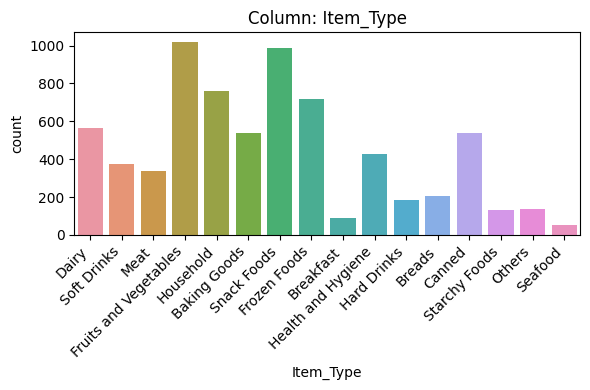

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1019 times (14.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [56]:
explore_categorical(df,'Item_Type')

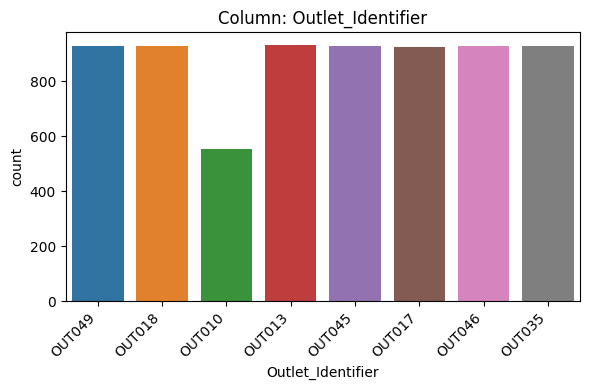

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: 'OUT013' occurs 932 times (13.2%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Identifier'}, xlabel='Outlet_Identifier', ylabel='count'>)

In [57]:
explore_categorical(df,'Outlet_Identifier')

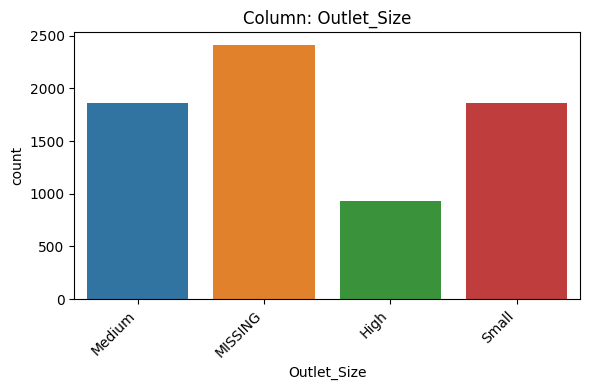

- NaN's Found: 2410 (34.14%)
- Unique Values: 4
- Most common value: 'MISSING' occurs 2410 times (34.14%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [58]:
explore_categorical(df,'Outlet_Size')

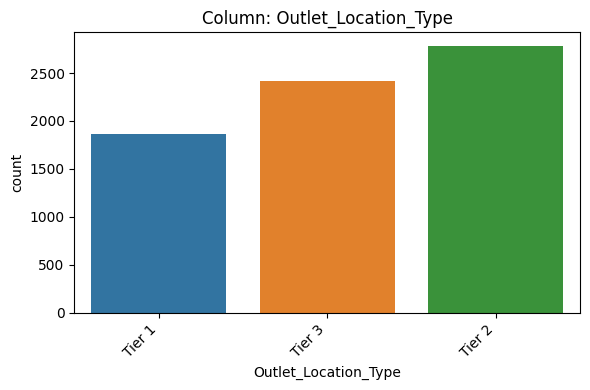

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 2' occurs 2785 times (39.45%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [59]:
explore_categorical(df,'Outlet_Location_Type')

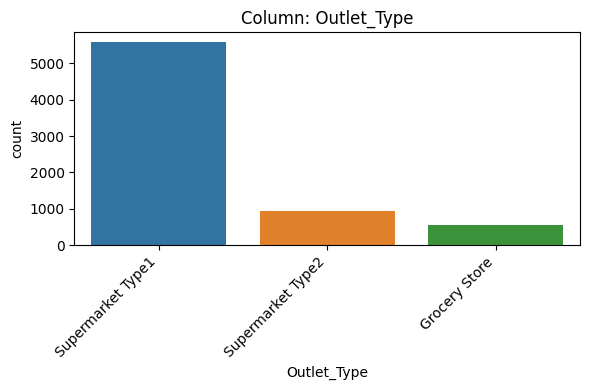

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Supermarket Type1' occurs 5577 times (78.99%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [60]:
explore_categorical(df,'Outlet_Type')

In [ ]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [67]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

In [71]:
def explore(df,x):
  print(df[x].dtype)
  if(x in df.select_dtypes('object').columns):
    explore_categorical(df,x)
  else:
    explore_numeric(df,x)

float64


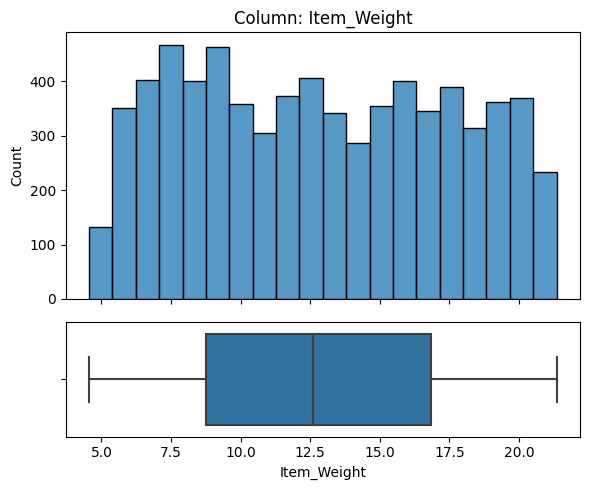

- NaN's Found: 0 (0.0%)
object


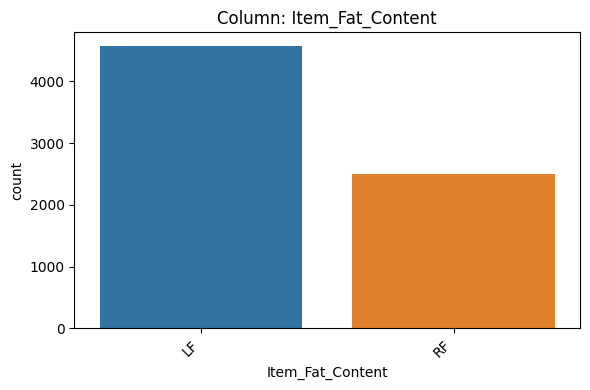

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'LF' occurs 4566 times (64.67%)
- Not constant or quasi-constant.
float64


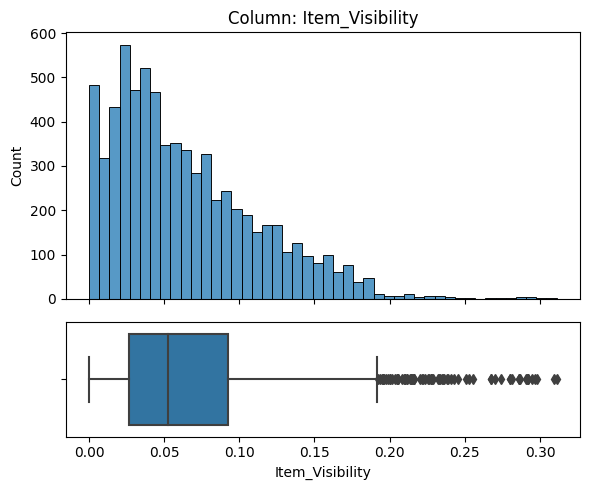

- NaN's Found: 0 (0.0%)
object


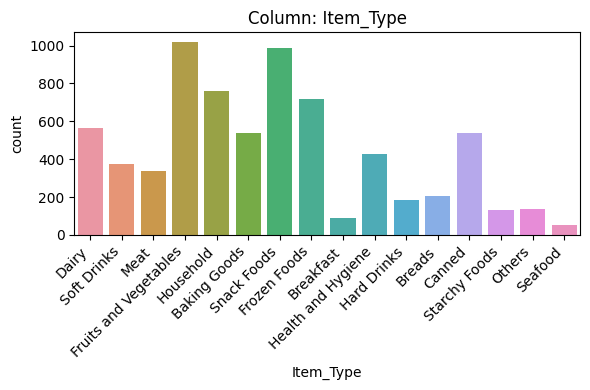

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1019 times (14.43%)
- Not constant or quasi-constant.
float64


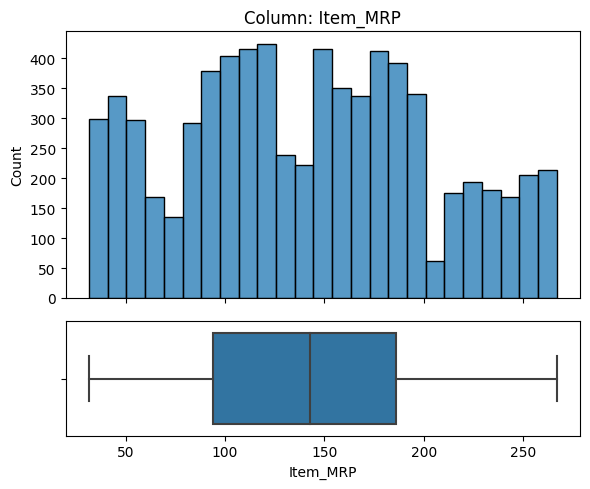

- NaN's Found: 0 (0.0%)
object


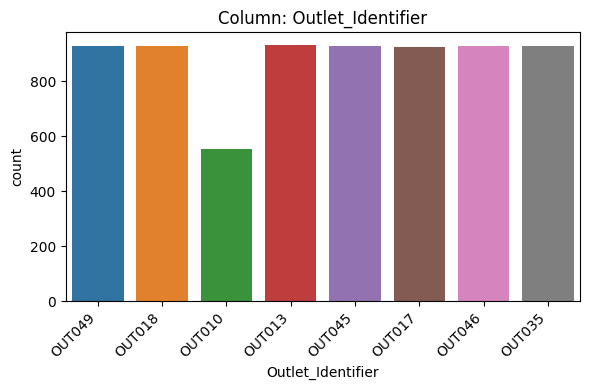

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: 'OUT013' occurs 932 times (13.2%)
- Not constant or quasi-constant.
int64


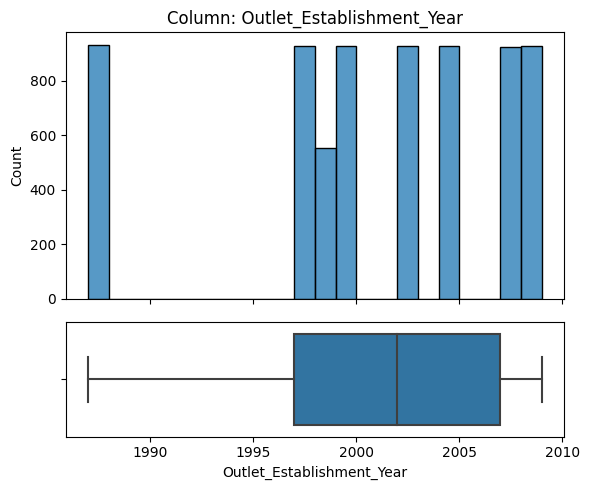

- NaN's Found: 0 (0.0%)
object


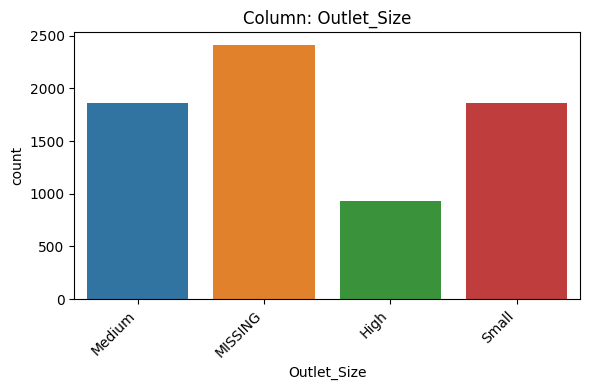

- NaN's Found: 2410 (34.14%)
- Unique Values: 4
- Most common value: 'MISSING' occurs 2410 times (34.14%)
- Not constant or quasi-constant.
object


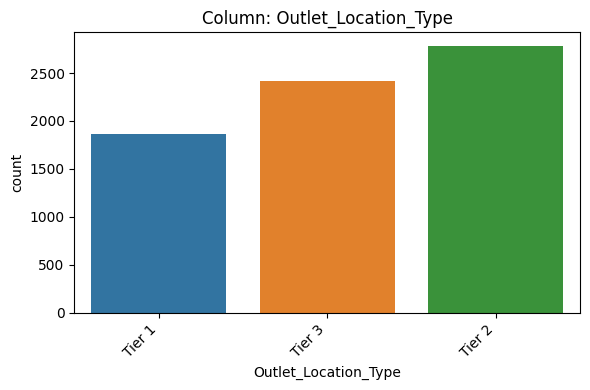

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 2' occurs 2785 times (39.45%)
- Not constant or quasi-constant.
object


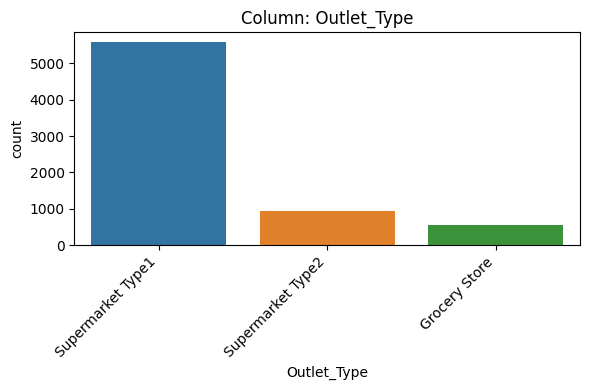

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Supermarket Type1' occurs 5577 times (78.99%)
- Not constant or quasi-constant.
float64


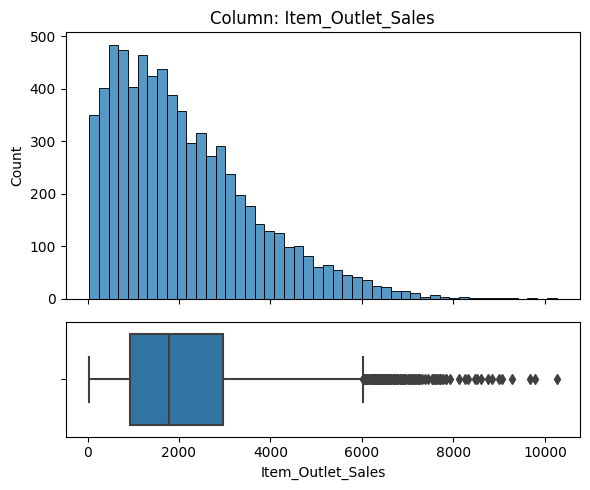

- NaN's Found: 0 (0.0%)


In [72]:
for i in df.drop(columns='Item_Identifier'):
  explore(df,i)